
# Project: Analysing Data of people not showing on appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### About the No-Show Appointments Dataset

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família .
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

#### Question

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [2]:
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# read dataset
df = pd.read_csv('noshowappo.csv')
df.head(10)

# print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


This dataset contains information:
* on the appointments (AppointmentID, ScheduledDay, AppointmentDay, SMS_received, No-Show)
* patients (PatientId, Gender, Age, Neighbourhood, Scholarship)
* and their health situation (Hipertension, Diabetes, Alcoholism, Handcap)

In [4]:
df.shape

(110527, 14)

The dataset contains 14 columns and 110527 rows of data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* Half of the patients are between 18 and 55 years old
* The average age is 37
* about 10 percent have a health scholarship
* about 20 percent have hypertension
* one third of the patients have received a sms
* 7 percent have diabetes
* 3 percent have alcoholism
* around 2 percent are handicaped.
* disturbing is that apparently one person has four handicaps (deaf,blind,etc?)
* The youngest patient seems to be unborn (age below 0), the oldest is 115;
* most people have no scholarship


### Data Cleaning :

* I would clean the data from the patientid and appointmentid as it has no specific meaning to identify the reason for showing up

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


 no rows contain missing data, so I dont need to handle this

I will drop out the ID as they are not interesting:

In [11]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

ValueError: labels ['PatientId' 'AppointmentID'] not contained in axis

In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


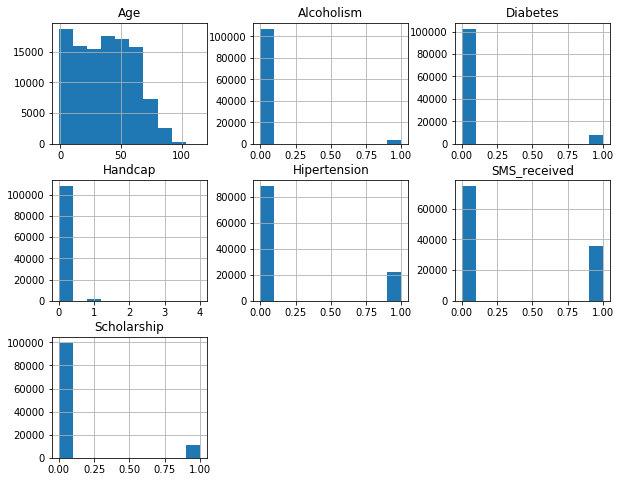

In [13]:
df.hist(figsize=(10,8));


* Most of the patients are non-alcoholics, don't have diabetes, a handicap, hipertension.
* Interesting is that most don't have a scholarship
* I would be interested if a scholarship leads to show off to an appointement, however not a significant number of patient have one, and only one third received a sms for their appointment this is also interesting if every person who get a sms will show off to their appointement.
* Until an age to 60 the age of patients is evenly distributed, however their are only a few older patient, I would not have seen that evenly


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:
### Does receiving a sms have an effect of showing up to the appointment

In [18]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
showing = df.No_show == 'No'
notshowing = df.No_show == 'Yes'

In [20]:
showing.head(10)

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7    False
8     True
9     True
Name: No_show, dtype: bool

In [21]:
# of those who did not show up, how many received a sms
df.SMS_received[notshowing].mean()

0.43837089475334917

In [22]:
# of those who showed up, how many received a sms
df.SMS_received[showing].mean()

0.29133411935425357

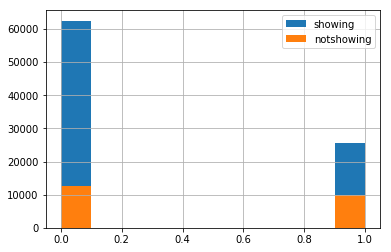

In [27]:
# show how many people who showed up got no sms or got one sms.
df.SMS_received[showing].hist(label = 'showing')
# show how many people who did not showed up got no sms or got one sms.
df.SMS_received[notshowing].hist(label = 'notshowing')
plt.legend();

In this graph we can see, that:
* more people received no sms than one sms
* this holds true for the people who showed up and those who did not show up
* of those people, who did not get an sms, only a small proportion did not show up
* however, of those people who received an sms, a larger proportion did not show up

Surprisingly:
* 43% of the no-show-patients received a sms
* 29% of the show-patients received a sms

In [33]:
sms_receivers = df.SMS_received == 1
no_sms_receivers = df.SMS_received == 0

In [34]:
sms_receivers.head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18     True
19    False
Name: SMS_received, dtype: bool

In [35]:
# convert no_show column to logical / binary values
df['NoShowBinary'] = (df.No_show == 'Yes')
df.head(15)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,NoShowBinary
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,False
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,True
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,True
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,False
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,False


of those who received a sms, how many did not show up (in %)?
27.5745448396


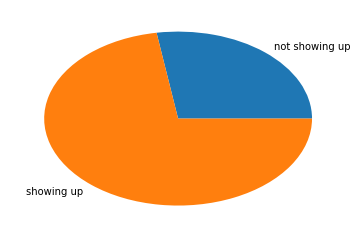

In [39]:
# of those who received a sms, how many did not show up?
print("of those who received a sms, how many did not show up (in %)?")
print(100* df.NoShowBinary[sms_receivers].mean())
# please note: NoShow == true means that the person did not come to the appointment
# NoShow == false means, that the person showed up at the appointment

# pie chart 1: how many of those, who received an sms, showed up?
percentage_not_showing_up = df.NoShowBinary[sms_receivers].mean();
percentage_showing_up = 1 - df.NoShowBinary[sms_receivers].mean();
plt.pie(x = [percentage_not_showing_up, percentage_showing_up], labels = ['not showing up', 'showing up']);


of those who did not received a sms, how many showed up (in %)?
16.7033113465


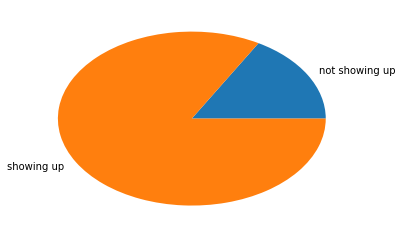

In [40]:
# of those who did not received a sms, how many showed up?
print("of those who did not received a sms, how many showed up (in %)?")
print(100*df.NoShowBinary[no_sms_receivers].mean());

# pie chart 2: of those who did not received a sms, how many showed up?
percentage_not_showing_up = df.NoShowBinary[no_sms_receivers].mean();
percentage_showing_up = 1 - df.NoShowBinary[no_sms_receivers].mean();
plt.pie(x = [percentage_not_showing_up, percentage_showing_up], labels = ['not showing up', 'showing up']);
# plt.pie(x = [  ], labels = [ ])


* around 28 % of those who received a sms DID NOT show up to the appointment.
* around 17 % of those who did not receive a sms DID NOT show up to the appointment

### Research Question 2
### Does age have an influence on showing up?

In [43]:
# showing = df.No_show == 'No'

below_18 = df.Age <= 18
from_18_to_55 = ((df.Age > 18) & (df.Age < 55))
above_55 = df.Age >= 55

In [44]:
df.NoShowBinary[below_18].mean()

0.21987044029514671

* 22 percent of young patients did not show up

In [45]:
df.NoShowBinary[from_18_to_55].mean()

0.21641918416111963

* around 22 percent of middle-aged patients did not show up

In [46]:
df.NoShowBinary[above_55].mean()

0.15762729441045317

* around 16 percent of elder patients did not show up

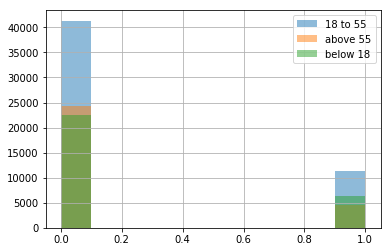

In [50]:
df.NoShowBinary[from_18_to_55].hist(label = '18 to 55', alpha=0.5)
df.NoShowBinary[above_55].hist(label = 'above 55', alpha=0.5)
df.NoShowBinary[below_18].hist(label = 'below 18', alpha=0.5)
plt.legend();

* In conclusion, younger and middle aged patients tend to show up less frequently than elder patients

<a id='conclusions'></a>
## Conclusions

Finding 1:
* There seems to be a relationship between patients receiving a sms and patients showing up. Apparently, patients who received a sms showed up less frequently (and patients who did not show up often received a SMS)

Finding 2:
* Age does not seem to have a very big influence on patients showing up. However, elder patients tend to show up more frequently


## Submitting your Project 



In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0